In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import date
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
file_url = 'http://www.sectorspdr.com/sectorspdr/IDCO.Client.Spdrs.Holdings/Export/ExportCsv?symbol='
string = "XLF"
etf = file_url + string

In [3]:
new_file = pd.read_csv(etf, skiprows=1)
new_file.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,Unnamed: 8
0,BRK.b,Berkshire Hathaway B,10.90%,169.62,-0.93,-0.55%,2.37 M,136.65 - 177.86,NaN
1,JPM,JP Morgan Chase & Co,10.47%,87.12,-0.40,-0.46%,10.00 M,57.05 - 93.98,NaN
2,WFC,Wells Fargo & Co,8.06%,52.98,-0.48,-0.90%,12.65 M,43.55 - 59.99,NaN
3,BAC,Bank of America Corp,7.78%,23.13,-0.36,-1.53%,72.33 M,12.05 - 25.80,NaN
4,C,Citigroup Inc,5.94%,63.83,-0.08,-0.13%,13.53 M,38.31 - 65.40,NaN


In [4]:
new_file = new_file.drop('Unnamed: 8', axis=1)
new_file.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,BRK.b,Berkshire Hathaway B,10.90%,169.62,-0.93,-0.55%,2.37 M,136.65 - 177.86
1,JPM,JP Morgan Chase & Co,10.47%,87.12,-0.40,-0.46%,10.00 M,57.05 - 93.98
2,WFC,Wells Fargo & Co,8.06%,52.98,-0.48,-0.90%,12.65 M,43.55 - 59.99
3,BAC,Bank of America Corp,7.78%,23.13,-0.36,-1.53%,72.33 M,12.05 - 25.80
4,C,Citigroup Inc,5.94%,63.83,-0.08,-0.13%,13.53 M,38.31 - 65.40


In [5]:
new_file.index = new_file.Symbol
new_file = new_file.drop('Symbol', axis=1)
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
BRK.b,Berkshire Hathaway B,10.90%,169.62,-0.93,-0.55%,2.37 M,136.65 - 177.86
JPM,JP Morgan Chase & Co,10.47%,87.12,-0.40,-0.46%,10.00 M,57.05 - 93.98
WFC,Wells Fargo & Co,8.06%,52.98,-0.48,-0.90%,12.65 M,43.55 - 59.99
BAC,Bank of America Corp,7.78%,23.13,-0.36,-1.53%,72.33 M,12.05 - 25.80
C,Citigroup Inc,5.94%,63.83,-0.08,-0.13%,13.53 M,38.31 - 65.40


In [6]:
new_file.columns

Index(['Company Name', 'Index Weight', 'Last', 'Change', '%Change', 'Volume',
       '52 Week Range'],
      dtype='object')

In [7]:
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, BRK.b to NAVI
Data columns (total 7 columns):
Company Name     66 non-null object
Index Weight     66 non-null object
Last             66 non-null float64
Change           66 non-null float64
%Change          66 non-null object
Volume           66 non-null object
52 Week Range    66 non-null object
dtypes: float64(2), object(5)
memory usage: 4.1+ KB


In [8]:
new_file.Change.value_counts().head(10)

-0.17    4
-0.30    3
-0.34    2
-0.27    2
-0.25    2
-0.76    2
-0.74    2
-0.48    2
-0.36    2
-0.31    2
Name: Change, dtype: int64

In [9]:
new_file.describe()

,Last,Change
count,66.000000,66.000000
mean,82.553485,-0.709242
std,64.863527,0.899099
min,13.060000,-3.950000
25%,44.312500,-0.845000
50%,65.145000,-0.415000
75%,100.285000,-0.250000
max,420.740000,1.720000


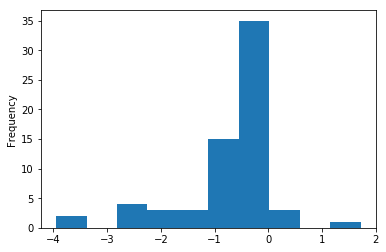

In [10]:
new_file.Change.plot('hist')

In [11]:
stat = new_file[new_file.Change > 0.6]
stat.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
RE,Everest Re Group Ltd,0.36%,256.58,1.72,+0.67%,369.87 K,169.19 - 259.94


(array([1]), <a list of 1 Text xticklabel objects>)

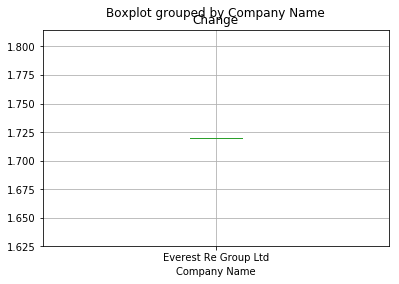

In [12]:
stat.boxplot(column='Change', by='Company Name')
plt.xticks()

In [13]:
new_file['Index Weight'] = new_file['Index Weight'].str.replace("%", " ").apply(pd.to_numeric)
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
BRK.b,Berkshire Hathaway B,10.90,169.62,-0.93,-0.55%,2.37 M,136.65 - 177.86
JPM,JP Morgan Chase & Co,10.47,87.12,-0.40,-0.46%,10.00 M,57.05 - 93.98
WFC,Wells Fargo & Co,8.06,52.98,-0.48,-0.90%,12.65 M,43.55 - 59.99
BAC,Bank of America Corp,7.78,23.13,-0.36,-1.53%,72.33 M,12.05 - 25.80
C,Citigroup Inc,5.94,63.83,-0.08,-0.13%,13.53 M,38.31 - 65.40
